# テスト

In [177]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [178]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

data = np.array([
    [166.0, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1],
])

x = data[:, 0]
y = data[:, 1]

inputs = torch.tensor((x - x.min()) / (x.max() - x.min())).float()
labels = torch.tensor((y - y.min()) / (y.max() - y.min())).float()
n_input = 5
n_output = 5
net = Net(n_input, n_output)

outputs = net(inputs)

In [179]:
for param in net.named_parameters():
    print(param)

('l1.weight', Parameter containing:
tensor([[ 0.4301, -0.4199, -0.0806,  0.1473, -0.1807],
        [-0.3071, -0.0638, -0.1037, -0.0972,  0.2159],
        [ 0.1904,  0.3385, -0.2828, -0.0110, -0.1383],
        [ 0.2100, -0.3946, -0.3367,  0.3122, -0.4389],
        [ 0.3072,  0.3434,  0.0874, -0.0713,  0.2674]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([-0.3765,  0.3179, -0.3053, -0.0020, -0.2640], requires_grad=True))


In [180]:
criterion = nn.MSELoss()
loss = criterion(outputs, labels)
loss.backward()


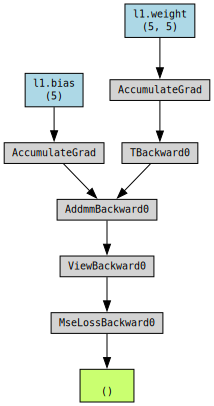

In [181]:
import torch.optim as optim
from torchviz import make_dot

lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [182]:
optimizer.step()
optimizer.zero_grad()

In [183]:
num_epochs = 500

history = np.array((0, 2))
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels) / 2.0
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch / Loss = {epoch} / {loss.item():.3f}')


Epoch / Loss = 0 / 0.275
Epoch / Loss = 100 / 0.246
Epoch / Loss = 200 / 0.219
Epoch / Loss = 300 / 0.196
Epoch / Loss = 400 / 0.175


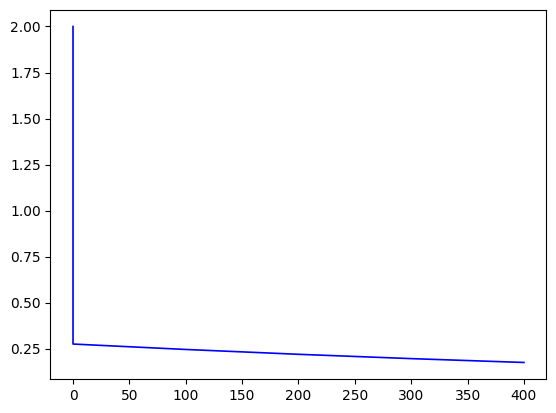

In [184]:
plt.plot(history[:, 0], history[:, 1], 'b')

In [185]:
print(f'{net.l1.weight} / {net.l1.bias}')

Parameter containing:
tensor([[ 0.4301, -0.3511, -0.0462,  0.1956, -0.1600],
        [-0.3071,  0.0062, -0.0687, -0.0482,  0.2369],
        [ 0.1904,  0.3698, -0.2672,  0.0109, -0.1289],
        [ 0.2100, -0.2926, -0.2858,  0.3836, -0.4084],
        [ 0.3072,  0.3372,  0.0843, -0.0756,  0.2656]], requires_grad=True) / Parameter containing:
tensor([-0.3077,  0.3879, -0.2741,  0.0999, -0.2702], requires_grad=True)


In [186]:
ans = net.l1.weight @ inputs + net.l1.bias

#plt.scatter(inputs.data.numpy(), ans.data.numpy(), 'r')
print(inputs)
print(labels)
print(ans)

tensor([0.0000, 1.0000, 0.5000, 0.7000, 0.3000])
tensor([0.0000, 1.0000, 0.2000, 0.6882, 0.0824])
tensor([-0.5930,  0.3971, -0.0690, -0.1896,  0.1359], grad_fn=<AddBackward0>)


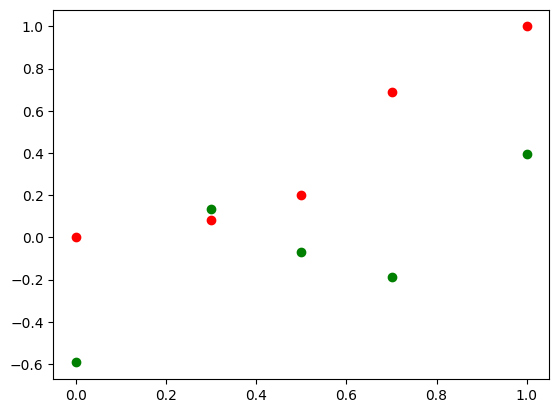

In [187]:
plt.scatter(inputs.data.numpy(), labels.data.numpy())
plt.scatter(inputs.data.numpy(), ans.data.numpy())